## Data exploration

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from PIL import Image, ImageChops

In [27]:
print(str(len(glob.glob("./training/11390/2012_01_05_17_06_01_0/*"))) + " Images for sample 1")
print(str(len(glob.glob("./training/*/*"))) + " Different Samples")
# Avg number of images per sample
print(str(len(glob.glob("./training/*/*/*"))/len(glob.glob("./training/*/*"))) + " Average number images per sample")

34 Images for sample 1
8336 Different Samples


KeyboardInterrupt: 

In [ ]:
# Data for a single sample
sample = []
for i in glob.glob("./training/11390/2012_01_05_17_06_01_0/*"):
    print(i)
    sample.append(Image.open(i))

./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__193.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__94.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__94.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T165601__193.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__171.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__magnetogram.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__211.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__211.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__131.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__171.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__304.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__1700.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T165601__335.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__1700.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__continuum.

In [ ]:
for i in glob.glob("./training/11390/2012_01_05_17_06_01_0/*_continuum.jpg"):
    print(i)

./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__continuum.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__continuum.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T165601__continuum.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__continuum.jpg


In [ ]:
for i in glob.glob("./training/11390/2012_01_05_17_06_01_0/*_magnetogram.jpg"):
    print(i)

./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__magnetogram.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__magnetogram.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__magnetogram.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T165601__magnetogram.jpg


In [ ]:
for i in glob.glob("./training/11390/2012_01_05_17_06_01_0/*_211.jpg"):
    print(i)

./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__211.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__211.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T165601__211.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__211.jpg


In [ ]:
# _# represents AIA wavelength for band #
# Hour Times: 05, 12, 15, 16
# Not sure what continuum images represent
for i in glob.glob("./training/11390/2012_01_05_17_06_01_0/*_304.jpg"):
    print(i)

./training/11390/2012_01_05_17_06_01_0/2012-01-05T120601__304.jpg
./training/11390/2012_01_05_17_06_01_0/2012-01-05T050601__304.jpg


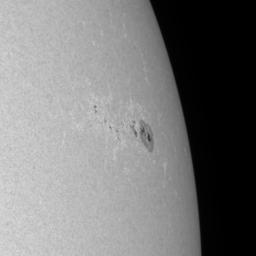

In [ ]:
sample[14]

In [ ]:
img = sample[17]

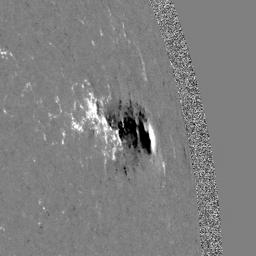

In [ ]:
Image.open("./training/11390/2012_01_05_17_06_01_0/2012-01-05T153601__magnetogram.jpg")

In [ ]:
print(img.format)
print(img.mode)

JPEG
L


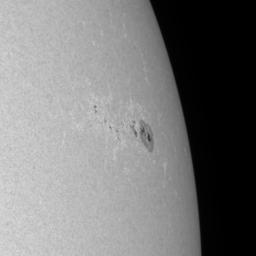

In [ ]:
img

In [ ]:
#8E-07 is peak flux for this sample
# Data Transformation 1: 
i = img.split()[0]
len(i.histogram())

256

## Baseline network

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer (sees 256x256x3 image tensor)
        self.conv1 = nn.Conv2d(in_channels=10, out_channels=16, kernel_size=3, padding=1)
        # Convolutional layer (sees 128x128x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Convolutional layer (sees 64x64x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear layer (64 * 32 * 32 = 65536)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        # Linear layer (512 -> 10)
        self.fc2 = nn.Linear(512, 10)
        # Dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # Flatten image input
        x = x.view(-1, 64 * 32 * 32)
        # Add dropout layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add dropout layer
        x = self.dropout(x)
        # Add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# Instantiate the CNN
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


## Training Loop
A single input will be a 4x256x256x10 matrix where dimensions represent: [timeinterval x height x width x wavelength/magnetogram]

In [4]:
from tqdm import tqdm
import pandas as pd

wavelengths = ["94","131", "171","193","211","304","335","1700","continuum","magnetogram"]
x = torch.zeros((1,4,256,256,10))
y = torch.zeros((1,1))
df = pd.read_csv('training/meta_data.csv')
# First we will loop over every active region number
for file in tqdm(glob.glob("./training/*")):
    for sample in glob.glob(file + "/*"):
        images = torch.empty((4,256,256,1), dtype=torch.int64)
        for wave in wavelengths:
            path = sample + "/*_{}.jpg".format(wave)
            pics = torch.tensor([np.array(Image.open(i)) for i in glob.glob(path)])
            if len(pics) < 1:
                pics = torch.cat((pics, torch.zeros((1, 256,256))), 0)
            if len(pics) < 2:
                pics = torch.cat((pics, torch.zeros((1, 256,256))), 0)
            if len(pics) < 3:
                pics = torch.cat((pics, torch.zeros((1, 256,256))), 0)
            if len(pics) < 4:
                pics = torch.cat((pics, torch.zeros((1, 256,256))), 0)
            pics = pics.reshape(4,256,256,1)
            images = torch.cat((images, pics), 3)
        images = images[:,:,:,1:]
        images = images.reshape(1,4,256,256,10)
        x = torch.cat((x, images), 0)
        idx = path.split("/")[2] + "_"+ path.split("/")[3]
        y = torch.cat((y, torch.tensor(df[df["id"] == idx]['peak_flux'].iloc[0]).reshape(-1,1)), 0)

  0%|          | 0/1092 [00:00<?, ?it/s]/var/folders/wg/9bhgbm4x79v4l40d7zq086040000gn/T/ipykernel_63260/301295306.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1673797381436/work/torch/csrc/utils/tensor_new.cpp:233.)
  pics = torch.tensor([np.array(Image.open(i)) for i in glob.glob(path)])
  7%|▋         | 80/1092 [33:27<7:03:12, 25.09s/it]  


KeyboardInterrupt: 

In [ ]:
print(x.shape)
print(y)
print(y.shape)

torch.Size([2, 4, 256, 256, 10])
tensor([[0.0000e+00],
        [1.0000e-09]], dtype=torch.float64)
torch.Size([2, 1])
